In [2]:
'''df1=pd.read_excel('Agriculture Data v1.1.xlsx')
df2 = pd.read_excel('Agriculture Data v1.1.xlsx', 'Test_Dataset')
df = pd.concat([df1, df2])
df.to_csv('Agriculture.csv',index=False)'''

"df1=pd.read_excel('Agriculture Data v1.1.xlsx')\ndf2 = pd.read_excel('Agriculture Data v1.1.xlsx', 'Test_Dataset')\ndf = pd.concat([df1, df2])\ndf.to_csv('Agriculture.csv',index=False)"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
from boruta import BorutaPy
from scipy import stats


In [3]:
df=pd.read_csv('Agriculture.csv')

In [42]:
df.shape

(246091, 12)

In [43]:
df.head()

,State Name,City Name,Crop_Year,Season,Crop Name,Area,Production,Rain Fall,Production per Area,Input Cost (High/Medium/Low),Market Price (High/Medium/Low),Return (High/Moderate/Low)
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,604.2,1.594896,Medium,Low,Low
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,604.2,0.500000,High,High,Moderate
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,604.2,3.147059,Low,Low,Low
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,1381.6,3.642045,Low,Low,Low
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,1381.6,0.229167,High,High,Moderate


In [44]:
df.tail()

,State Name,City Name,Crop_Year,Season,Crop Name,Area,Production,Rain Fall,Production per Area,Input Cost (High/Medium/Low),Market Price (High/Medium/Low),Return (High/Moderate/Low)
246086,West Bengal,PURULIA,2012,Winter,Sesamum,224.0,88.0,48.400,0.392857,High,High,Low
246087,West Bengal,PURULIA,2013,Winter,Rice,302274.0,730136.0,48.400,2.415477,Low,Low,Moderate
246088,West Bengal,PURULIA,2013,Winter,Sesamum,208.0,101.0,21.800,0.485577,High,High,Low
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0,21.800,2.141848,Low,Low,Moderate
246090,West Bengal,PURULIA,2014,Winter,Sesamum,175.0,88.0,44.215,0.502857,Medium,Medium,Low


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 12 columns):
State Name                        246091 non-null object
City Name                         246091 non-null object
Crop_Year                         246091 non-null int64
Season                            246091 non-null object
Crop Name                         246091 non-null object
Area                              246091 non-null float64
Production                        242361 non-null float64
Rain Fall                         245854 non-null float64
Production
per Area               246091 non-null float64
Input Cost
(High/Medium/Low)      246091 non-null object
Market Price
(High/Medium/Low)    246091 non-null object
Return
(High/Moderate/Low)        246091 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 22.5+ MB


# Null value treatment

In [46]:
df.isna().sum() # no null values

State Name                            0
City Name                             0
Crop_Year                             0
Season                                0
Crop Name                             0
Area                                  0
Production                         3730
Rain Fall                           237
Production\nper Area                  0
Input Cost\n(High/Medium/Low)         0
Market Price\n(High/Medium/Low)       0
Return\n(High/Moderate/Low)           0
dtype: int64

In [47]:
df=df.dropna()

In [48]:
df['Crop_Year']= df['Crop_Year'].astype('object', copy=False)

##### we drop null values since they are very less in number

In [49]:
# pp.ProfileReport(df)

##### There is 0.25 correlation between production and production per area which is fine
##### Correlation between season and input_cost, Market_cost,Return

# Outlier Treatment

##### There are lot of outliers so we must plot bar plots for numerical columns to visualize

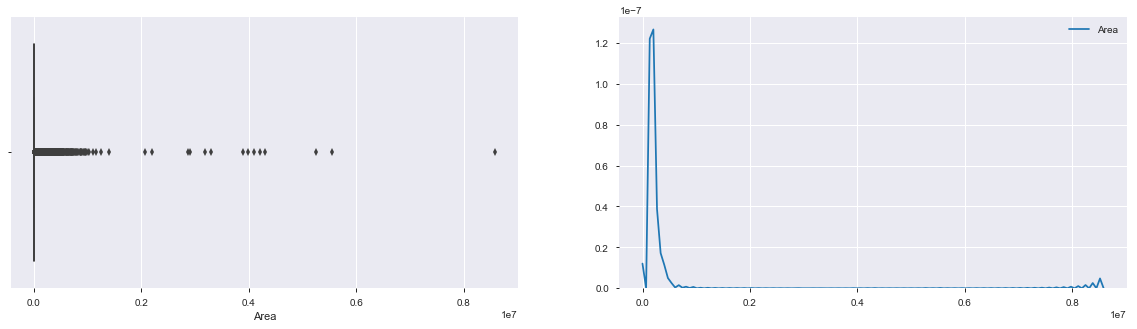

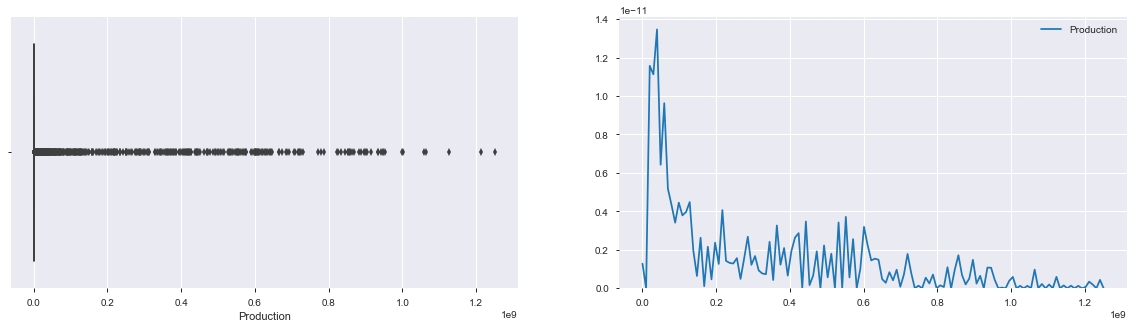

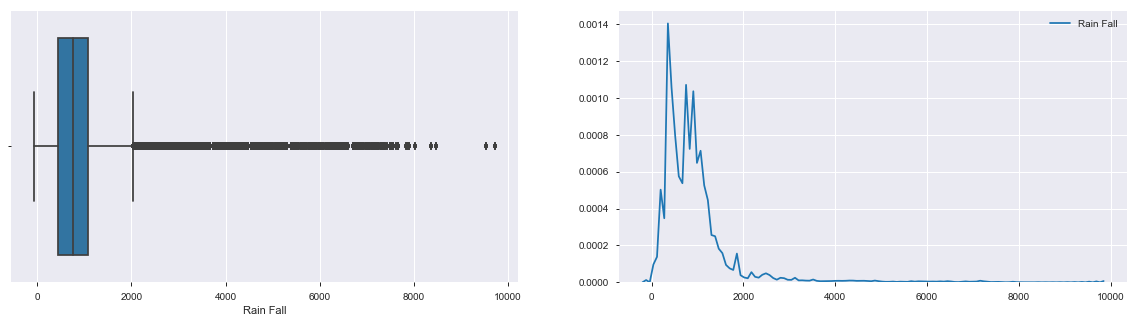

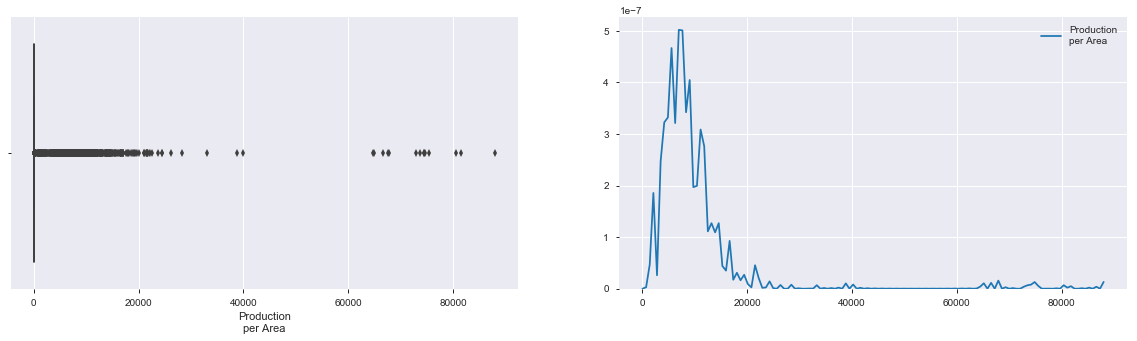

In [50]:
for i in df.select_dtypes([np.number]).columns:
    f,ax=plt.subplots(1,2,figsize=(20,5))
    sns.boxplot(df[i], ax=ax[0])
    sns.kdeplot(df[i], ax=ax[1])
    plt.show()

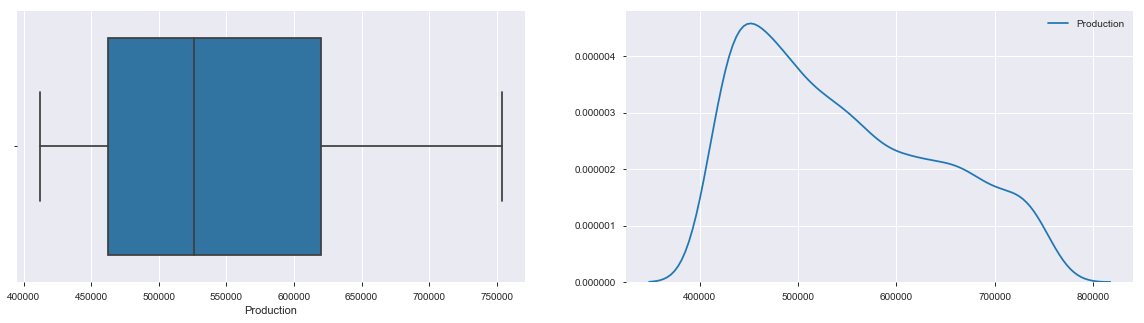

In [51]:
    f,ax=plt.subplots(1,2,figsize=(20,5))
    sns.boxplot(df[(abs(stats.zscore(df['Production'])) < 0.01)]['Production'], ax=ax[0])
    sns.kdeplot(df[(abs(stats.zscore(df['Production'])) < 0.01)]['Production'], ax=ax[1])
    plt.show()

In [52]:
df[(abs(stats.zscore(df['Production'])) < 0.01)]['Production'].count()

2531

In [53]:
df[(abs(stats.zscore(df['Production'])) < 0.01)]['Production'].count()/df['Production'].count()

0.01045301923339019

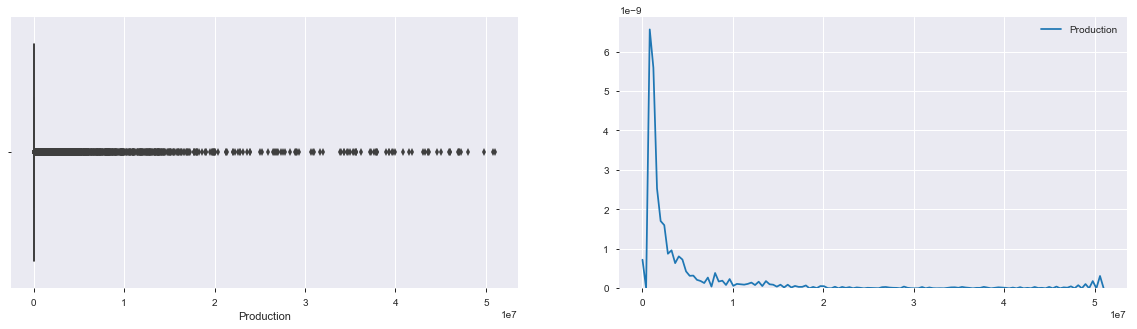

In [54]:
    f,ax=plt.subplots(1,2,figsize=(20,5))
    sns.boxplot(df[(abs(stats.zscore(df['Production'])) < 3)]['Production'], ax=ax[0])
    sns.kdeplot(df[(abs(stats.zscore(df['Production'])) < 3)]['Production'], ax=ax[1])
    plt.show()

In [55]:
df[(abs(stats.zscore(df['Production'])) < 3)]['Production'].count()

241793

In [56]:
df[(abs(stats.zscore(df['Production'])) < 0.3)]['Production'].count()/df['Production'].count()

0.9966712234286399

df_outliers_20000=df[(df['Production\nper Area']>2)&(df['Production\nper Area']<20000)]

In [57]:
df_outliers=df[df['Production\nper Area']>2]
df_outliers['Crop Name'].unique()

array(['Rice', 'Banana', 'Coconut ', 'Dry ginger', 'Sweet potato',
       'Tapioca', 'Sugarcane', 'Dry chillies', 'Turmeric', 'Maize',
       'Arecanut', 'Ragi', 'Onion', 'Jowar', 'Potato',
       'Beans & Mutter(Vegetable)', 'Bhindi', 'Brinjal', 'Citrus Fruit',
       'Grapes', 'Mango', 'Orange', 'Papaya', 'Pome Fruit', 'Tomato',
       'Bajra', 'Mesta', 'other oilseeds', 'Lemon', 'Pome Granet',
       'Sapota', 'Cabbage', 'Cotton(lint)', 'Tobacco', 'Groundnut',
       'Gram', 'Rapeseed &Mustard', 'Other Fresh Fruits', 'Soyabean',
       'Garlic', 'Ginger', 'Wheat', 'Oilseeds total', 'Pulses total',
       'Jute', 'Pineapple', 'Paddy', 'Black pepper', 'Arhar/Tur',
       'Masoor', 'Peas & beans (Pulses)', 'Small millets', 'Sannhamp',
       'Barley', 'Other Kharif pulses', 'Khesari', 'Sunflower',
       'Niger seed', 'Other Vegetables', 'Castor seed',
       'Other Cereals & Millets', 'Sesamum', 'Guar seed', 'Urad',
       'Coriander', 'Other  Rabi pulses', 'Linseed', 'Safflower',
   

##### Since production is calculated based on weight varies by a huge margin between pulses, vegetables, coconut, sugarcane, etc


# Log transformation to treat outliers and the Posituive Skewness

In [69]:
df1 = np.log(df.select_dtypes(include=['float64','int64'])+1).join(df.select_dtypes(include=['object']))

C:\Users\hari\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


In [70]:
df1.to_csv('df1.csv',index=False)

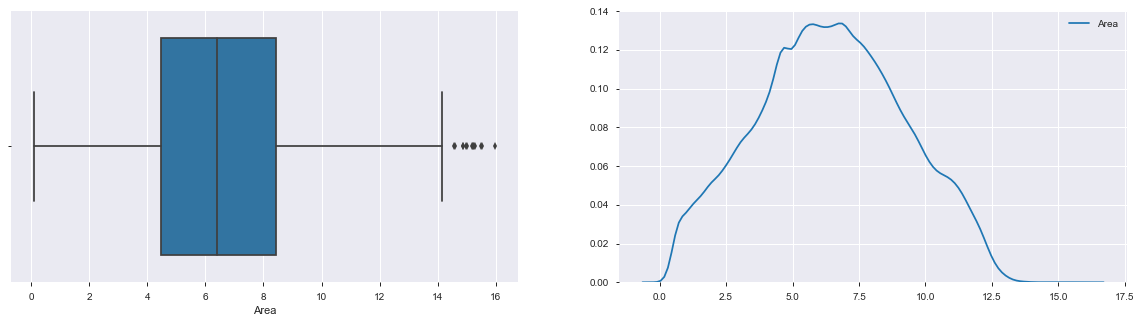

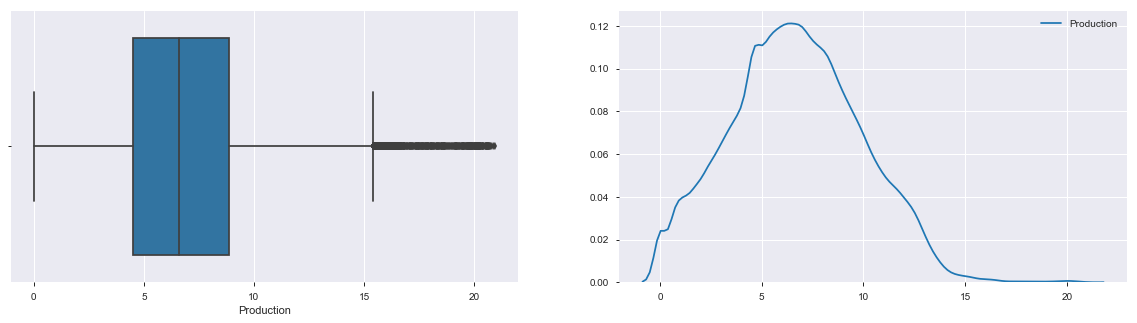

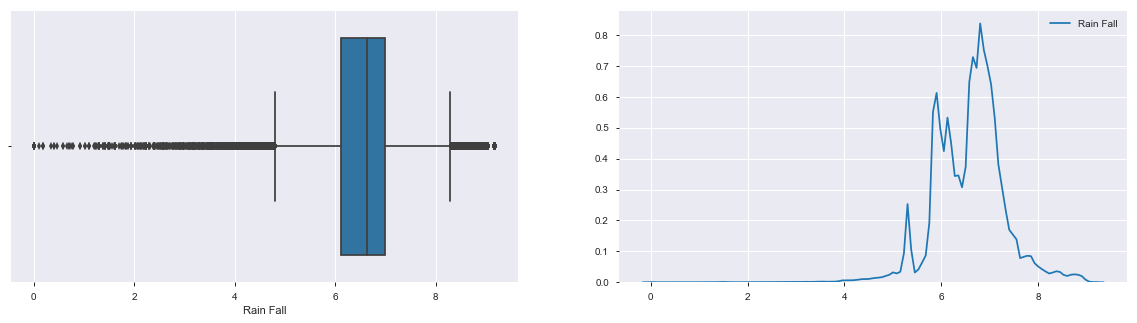

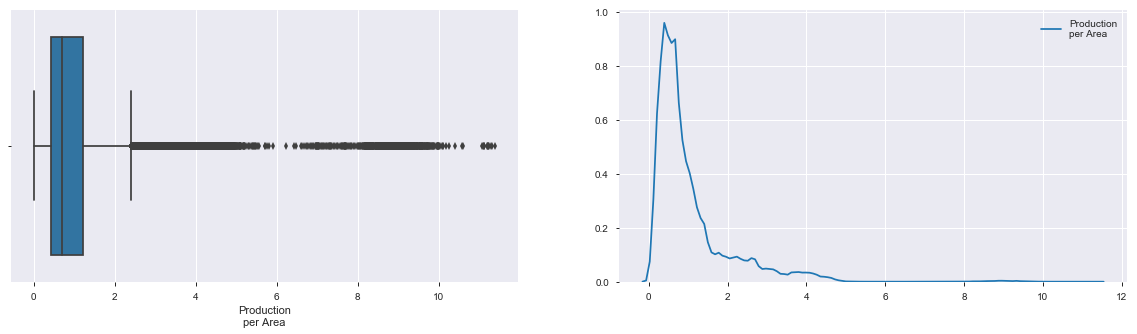

In [60]:
for i in df1.select_dtypes([np.number]).columns:
    f,ax=plt.subplots(1,2,figsize=(20,5))
    sns.boxplot(df1[i], ax=ax[0])
    sns.kdeplot(df1[i], ax=ax[1])
    plt.show()

##### Since Production per Area is a calculated field, we will not be considering it for modelling. So we can ignore it's positive skewness

# Outlier detection for 'Production\nper Area' column

In [61]:
df[(abs(stats.zscore(df['Production\nper Area'])) > 3)]['Crop Name'].unique()

array(['Coconut ', 'Sugarcane', 'Cashewnut'], dtype=object)

##### Production per Area is very high wherever 'Coconut ', 'Sugarcane', 'Cashewnut' is grown
####  we must perform log transformation on these columns since we shouldn't ignore these extreme values as they might be driving the market price as they are the major producers

##### sugar cane and coconuts weigh a lot but cashew nut would not. so we must check if the values for cashew nut is right or wrong

In [62]:
df[df['Crop Name']=='Cashewnut'].sort_values(['Production\nper Area'],ascending=False)

,State Name,City Name,Crop_Year,Season,Crop Name,Area,Production,Rain Fall,Production per Area,Input Cost (High/Medium/Low),Market Price (High/Medium/Low),Return (High/Moderate/Low)
228923,Tamil Nadu,PERAMBALUR,2008,Whole Year,Cashewnut,1.00,9801.00,1042.700,9801.000000,Low,Low,Moderate
124523,Puducherry,MAHE,1999,Whole Year,Cashewnut,11.00,77.00,883.496,7.000000,Low,Low,Low
105472,Meghalaya,WEST GARO HILLS,2014,Whole Year,Cashewnut,3625.00,9781.00,630.819,2.698207,Low,Low,Low
105441,Meghalaya,WEST GARO HILLS,2013,Whole Year,Cashewnut,3609.00,9726.00,1388.183,2.694929,Low,Low,Low
105411,Meghalaya,WEST GARO HILLS,2012,Whole Year,Cashewnut,4899.00,12603.00,741.900,2.572566,Low,Low,Low
225625,Tamil Nadu,ERODE,2008,Whole Year,Cashewnut,25.00,64.00,792.100,2.560000,Low,Low,Moderate
104952,Meghalaya,SOUTH WEST GARO HILLS,2014,Whole Year,Cashewnut,1493.00,3798.00,621.153,2.543871,Low,Low,Low
104922,Meghalaya,SOUTH WEST GARO HILLS,2013,Whole Year,Cashewnut,1482.00,3758.00,1082.396,2.535762,Low,Low,Low
105383,Meghalaya,WEST GARO HILLS,2011,Whole Year,Cashewnut,4709.00,11820.00,464.600,2.510087,Low,Low,Low
105352,Meghalaya,WEST GARO HILLS,2010,Whole Year,Cashewnut,4665.00,11544.00,495.400,2.474598,Low,Low,Low


When compared with other rows we can see that one of the row with Production\nper Area value = 9801 is a typo and it must be removed 

In [63]:
df=df.drop(index=228923)

In [64]:
df[df['Crop Name']=='Cashewnut'].sort_values(['Production\nper Area'],ascending=False)

,State Name,City Name,Crop_Year,Season,Crop Name,Area,Production,Rain Fall,Production per Area,Input Cost (High/Medium/Low),Market Price (High/Medium/Low),Return (High/Moderate/Low)
124523,Puducherry,MAHE,1999,Whole Year,Cashewnut,11.00,77.00,883.496,7.000000,Low,Low,Low
105472,Meghalaya,WEST GARO HILLS,2014,Whole Year,Cashewnut,3625.00,9781.00,630.819,2.698207,Low,Low,Low
105441,Meghalaya,WEST GARO HILLS,2013,Whole Year,Cashewnut,3609.00,9726.00,1388.183,2.694929,Low,Low,Low
105411,Meghalaya,WEST GARO HILLS,2012,Whole Year,Cashewnut,4899.00,12603.00,741.900,2.572566,Low,Low,Low
225625,Tamil Nadu,ERODE,2008,Whole Year,Cashewnut,25.00,64.00,792.100,2.560000,Low,Low,Moderate
104952,Meghalaya,SOUTH WEST GARO HILLS,2014,Whole Year,Cashewnut,1493.00,3798.00,621.153,2.543871,Low,Low,Low
104922,Meghalaya,SOUTH WEST GARO HILLS,2013,Whole Year,Cashewnut,1482.00,3758.00,1082.396,2.535762,Low,Low,Low
105383,Meghalaya,WEST GARO HILLS,2011,Whole Year,Cashewnut,4709.00,11820.00,464.600,2.510087,Low,Low,Low
105352,Meghalaya,WEST GARO HILLS,2010,Whole Year,Cashewnut,4665.00,11544.00,495.400,2.474598,Low,Low,Low
124542,Puducherry,MAHE,2001,Whole Year,Cashewnut,11.00,22.00,739.181,2.000000,Medium,Low,Low


# Outlier detection for 'Area'column

In [65]:
from scipy import stats
df[(abs(stats.zscore(df['Area'])) > 3)]

,State Name,City Name,Crop_Year,Season,Crop Name,Area,Production,Rain Fall,Production per Area,Input Cost (High/Medium/Low),Market Price (High/Medium/Low),Return (High/Moderate/Low)
208,Andhra Pradesh,ANANTAPUR,1997,Kharif,Groundnut,650800.0,228400.0,1203.400,0.350953,High,High,Moderate
236,Andhra Pradesh,ANANTAPUR,1998,Kharif,Groundnut,755200.0,867800.0,928.500,1.149100,Medium,Medium,Moderate
261,Andhra Pradesh,ANANTAPUR,1999,Kharif,Groundnut,694865.0,249457.0,450.800,0.359001,High,High,Moderate
294,Andhra Pradesh,ANANTAPUR,2000,Kharif,Groundnut,791559.0,884963.0,464.600,1.118000,Medium,Medium,Moderate
342,Andhra Pradesh,ANANTAPUR,2001,Kharif,Groundnut,758700.0,333828.0,2502.734,0.440000,High,High,Moderate
386,Andhra Pradesh,ANANTAPUR,2002,Kharif,Groundnut,732262.0,259953.0,3111.455,0.355000,High,High,Moderate
443,Andhra Pradesh,ANANTAPUR,2003,Kharif,Groundnut,670935.0,187862.0,2351.395,0.280000,High,High,Moderate
498,Andhra Pradesh,ANANTAPUR,2004,Kharif,Groundnut,857823.0,684543.0,1838.713,0.798000,Medium,Medium,Moderate
540,Andhra Pradesh,ANANTAPUR,2005,Kharif,Groundnut,877029.0,362213.0,200.100,0.413000,High,High,Moderate
581,Andhra Pradesh,ANANTAPUR,2006,Kharif,Groundnut,644007.0,43148.0,348.500,0.066999,High,High,Moderate


##### Values entered are all correct .


# Count Plots for categorical columns

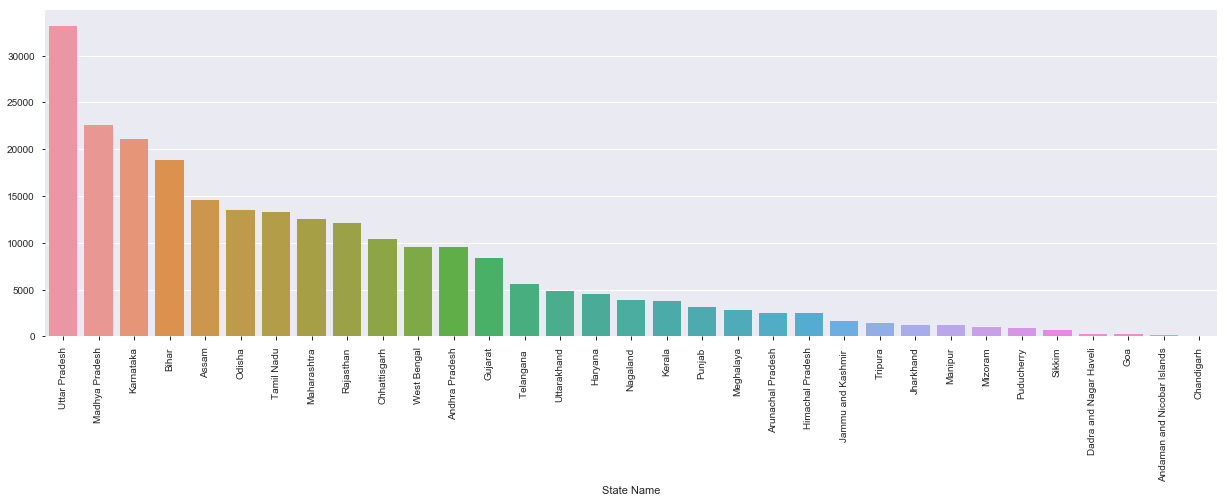

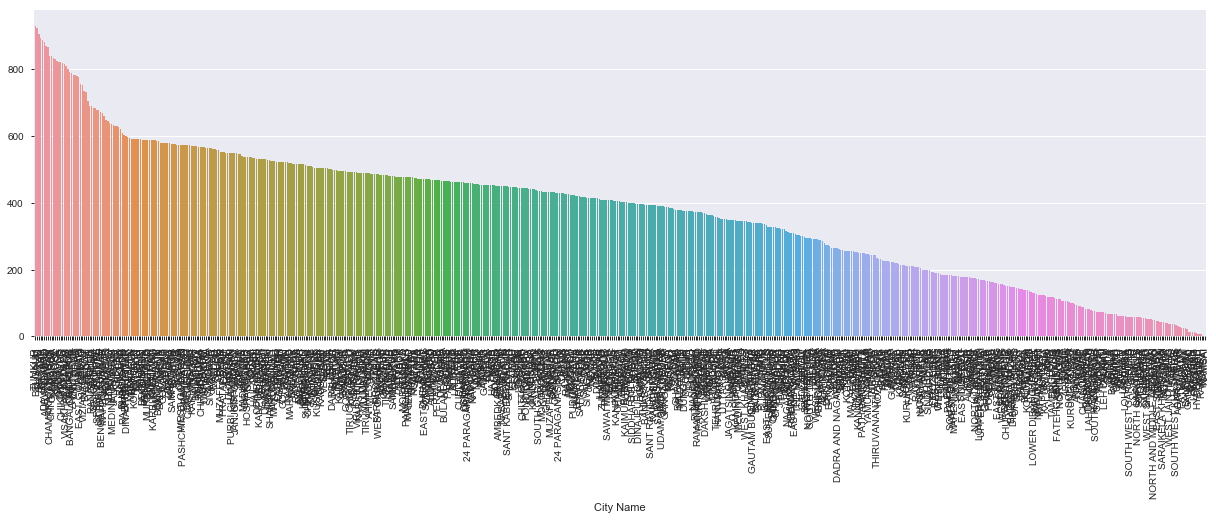

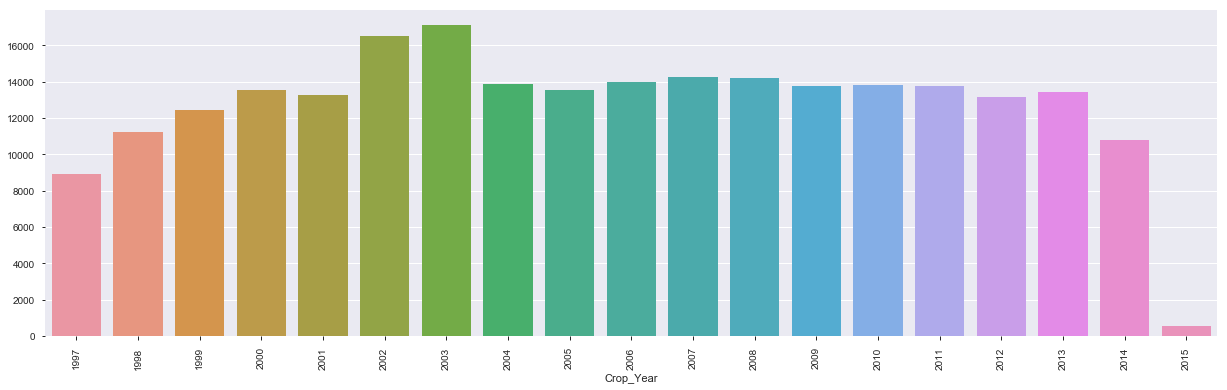

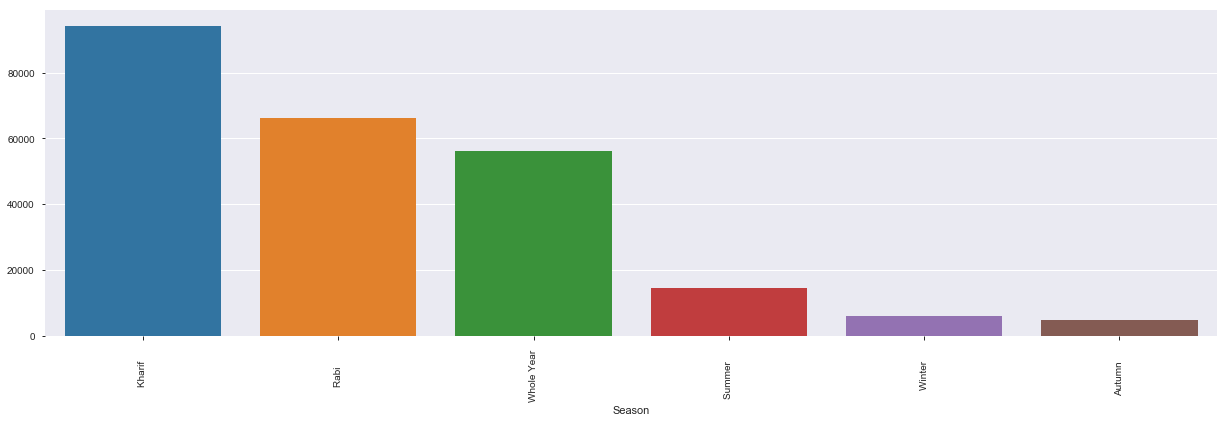

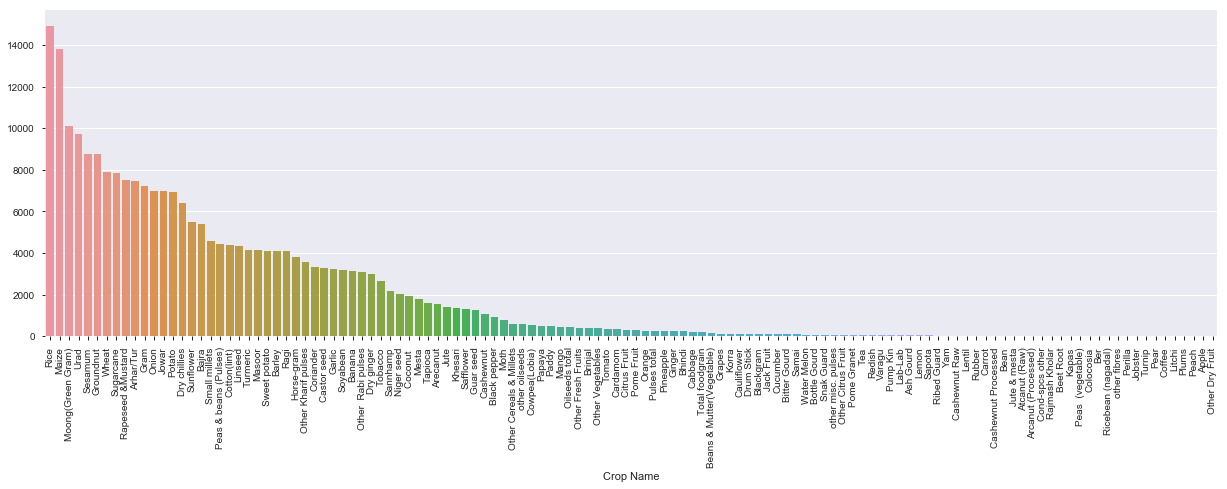

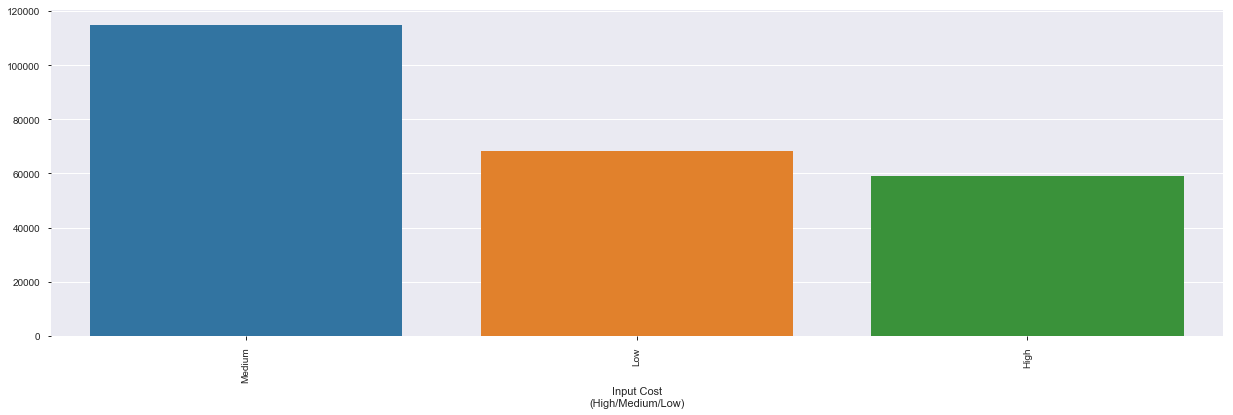

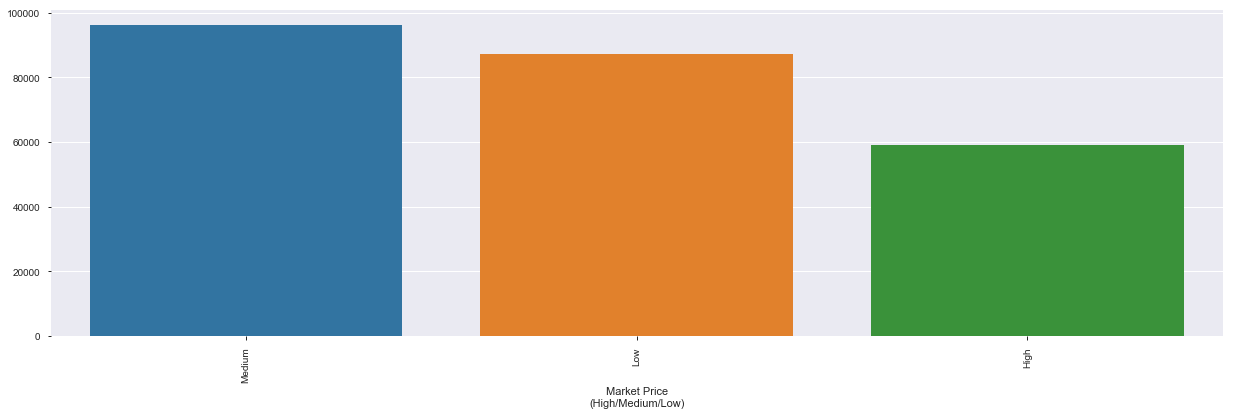

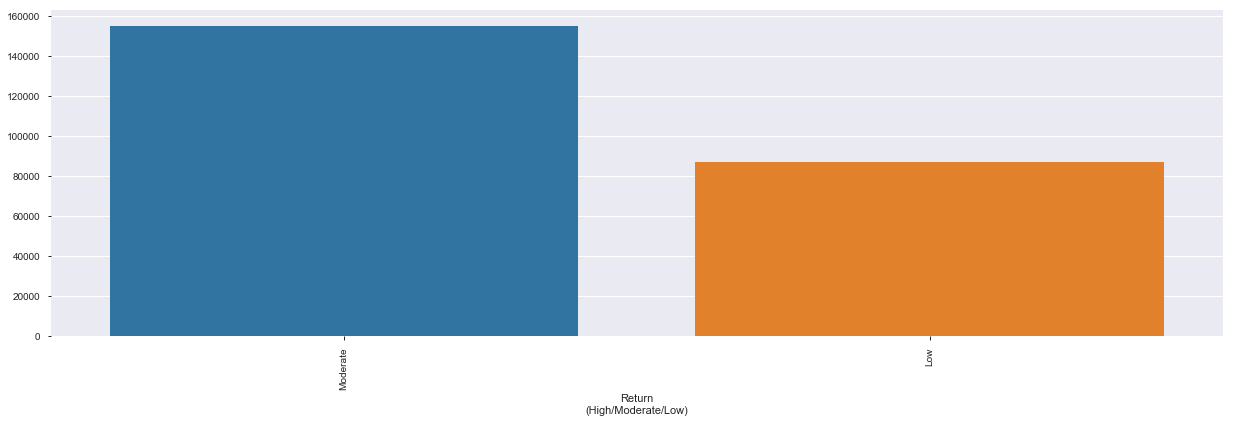

In [66]:
for i in df.select_dtypes([np.object]).columns:
    plt.figure(figsize=(21,6))
    sns.barplot(df[i].value_counts().index,df[i].value_counts().values)
    plt.xlabel(i)
    plt.xticks(rotation='vertical')
    plt.show()

# Conversion of categorical to numerical

In [67]:
df['Input Cost\n(High/Medium/Low)']=df['Input Cost\n(High/Medium/Low)'].replace(['High','Medium','Low'],[3,2,1])
df['Market Price\n(High/Medium/Low)']=df['Market Price\n(High/Medium/Low)'].replace(['High','Medium','Low'],[3,2,1])
df['Return\n(High/Moderate/Low)']=df['Return\n(High/Moderate/Low)'].replace(['Moderate','Low'],[2,1])

##### as cost is an ordinal data(high, medium, low) we can encode these values as 3, 2, 1  

##### for othe columns such as ['State Name', 'City Name', 'Season', 'Crop Name'] we can do label encodinng

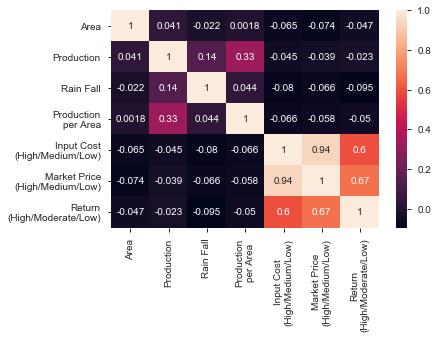

In [68]:
sns.heatmap(df.corr(),annot=True)

In [31]:
#sns.pairplot(df)

# Problem Statement

##### 1. predicting the yield before growing the crop (production/area = yield)
##### 2. Predicting the ROI (after predicting Market price for given yield)

There is High, Medium, Low in both Input cost and Market Price but only Medium and Low is given for Return. <br>
This shows that there is very bad return on investment for the indian farmers.<br>
This can be oovercome by predicting the yield properly so that the farmer can choose what to grow and what returns to expect

# Sample dataset

##### we can use rainfall as a parameter to cluster states 

In [32]:
df.groupby(['State Name'],as_index=False).mean()[['State Name','Rain Fall']].sort_values(by=['Rain Fall'],ascending=False)

,State Name,Rain Fall
15,Kerala,5027.039583
0,Andaman and Nicobar Islands,1694.596766
14,Karnataka,1598.965632
5,Chandigarh,1027.990449
19,Meghalaya,930.646431
11,Himachal Pradesh,917.125107
1,Andhra Pradesh,828.501878
31,Uttarakhand,825.758144
23,Puducherry,820.407446
28,Telangana,819.441962


# We don't have up to date data for all states

In [33]:
df.groupby(['State Name'],as_index=False).max()

,State Name,City Name,Crop_Year,Season,Crop Name,Area,Production,Rain Fall,Production per Area,Input Cost (High/Medium/Low),Market Price (High/Medium/Low),Return (High/Moderate/Low)
0,Andaman and Nicobar Islands,SOUTH ANDAMANS,2010,Whole Year,other oilseeds,18394.7,7.130000e+07,3365.900,4896.978022,3,3,2
1,Andhra Pradesh,WEST GODAVARI,2014,Whole Year,other oilseeds,877029.0,7.801620e+08,3521.164,33089.005477,3,3,2
2,Arunachal Pradesh,WEST SIANG,2014,Whole Year,Wheat,25561.0,3.501000e+04,1843.700,42.225564,3,3,2
3,Assam,UDALGURI,2014,Winter,other misc. pulses,152987.0,6.071900e+07,3521.164,28334.155972,3,3,2
4,Bihar,VAISHALI,2014,Winter,Wheat,212760.0,9.614539e+06,3521.164,500.491525,3,3,2
5,Chandigarh,CHANDIGARH,2010,Whole Year,Wheat,880.0,3.960000e+03,1857.000,31.666667,2,2,2
6,Chhattisgarh,SURGUJA,2014,Whole Year,other misc. pulses,545965.0,2.129180e+06,1731.200,97.315789,3,3,2
7,Dadra and Nagar Haveli,DADRA AND NAGAR HAVELI,2014,Winter,Wheat,14123.0,1.229600e+05,1147.269,370.000000,3,3,2
8,Goa,SOUTH GOA,2014,Whole Year,Sugarcane,40819.0,7.141000e+07,1183.300,4995.103525,3,3,2
9,Gujarat,VALSAD,2012,Whole Year,other oilseeds,499100.0,1.175400e+07,3521.164,235.000000,3,3,2


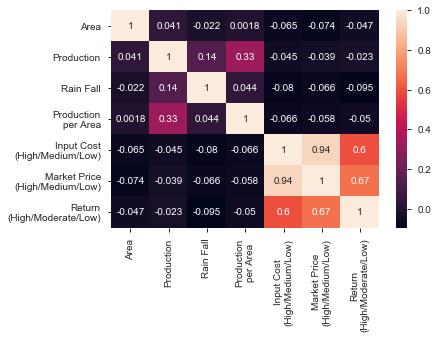

In [34]:
sns.heatmap(df.corr(),annot=True)

# Karnataka data

In [35]:
df_karnataka=df[df['State Name']=='Karnataka']

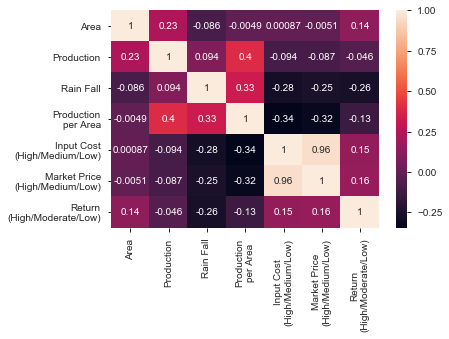

In [37]:
sns.heatmap(df_karnataka.corr(),annot=True)

# Individual correlation for all states

In [39]:
df_feature_selection=df[['Production','State Name', 'City Name', 'Season', 'Crop Name', 'Area',
        'Rain Fall','Input Cost\n(High/Medium/Low)']]

Andaman and Nicobar Islands


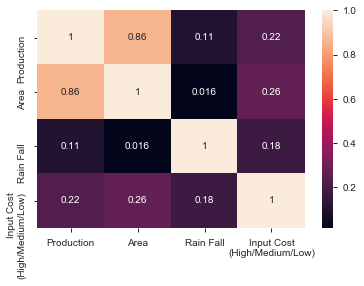

Andhra Pradesh


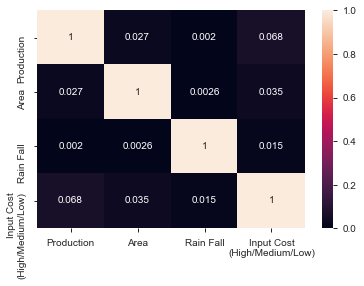

Arunachal Pradesh


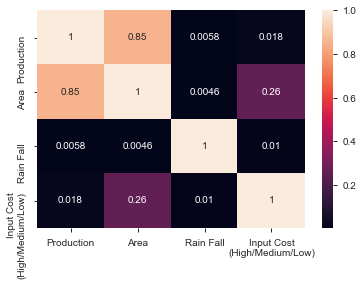

Assam


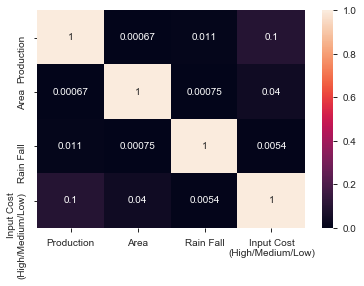

Bihar


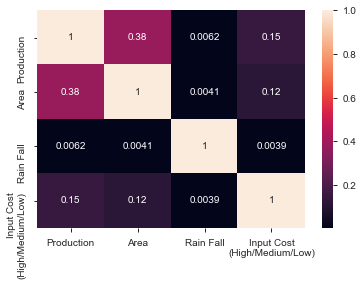

Chandigarh


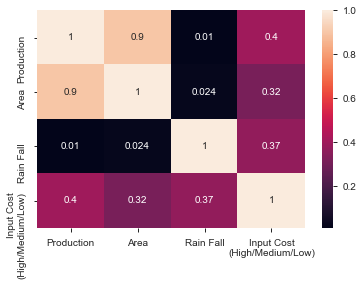

Dadra and Nagar Haveli


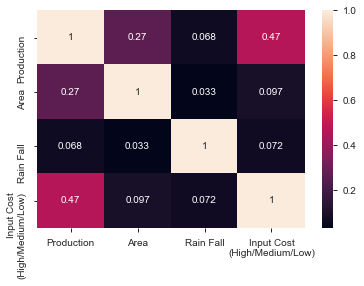

Goa


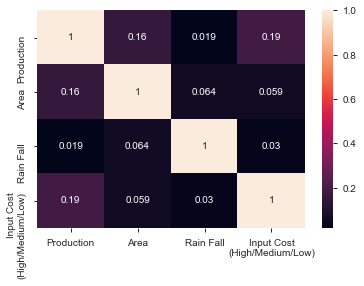

Gujarat


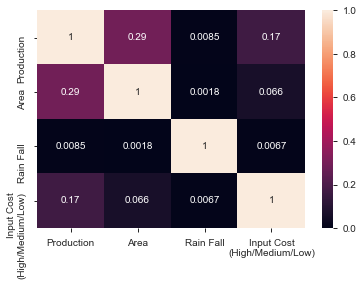

Haryana


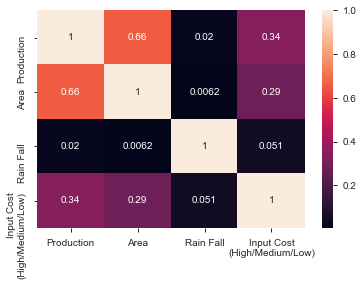

Himachal Pradesh


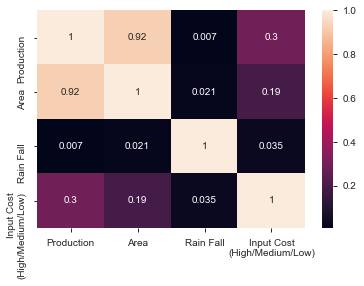

Jammu and Kashmir 


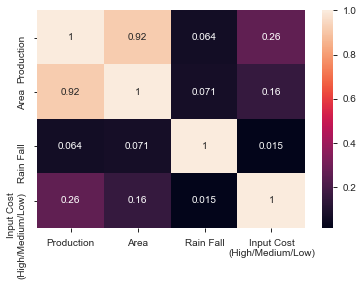

Jharkhand


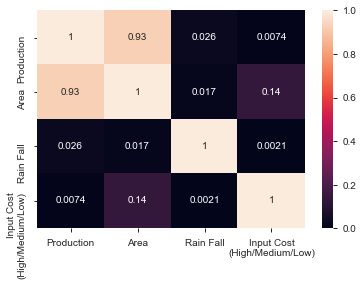

Madhya Pradesh


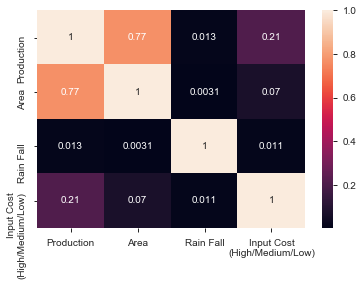

Maharashtra


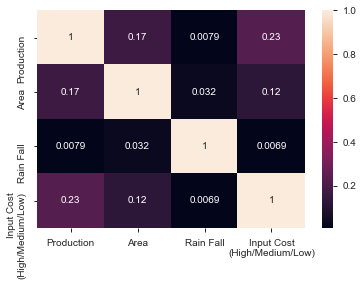

Manipur


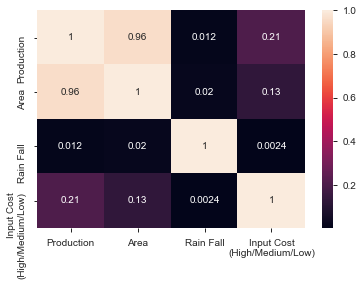

Meghalaya


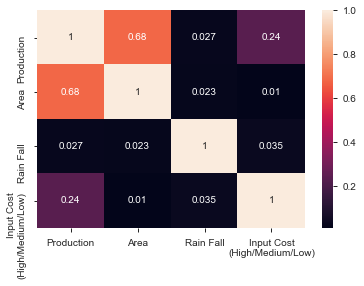

Mizoram


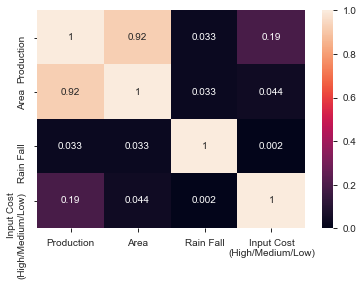

Nagaland


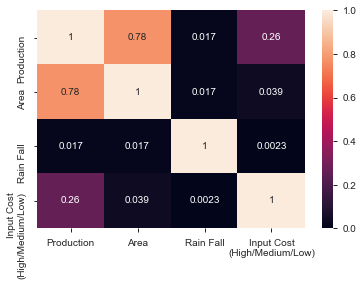

Odisha


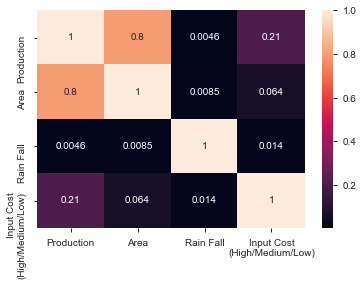

Puducherry


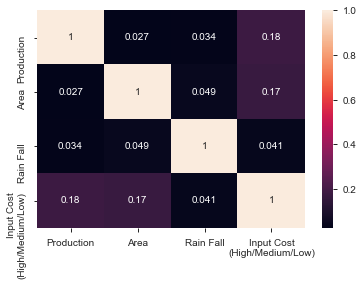

Punjab


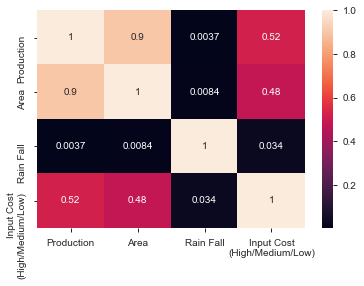

Rajasthan


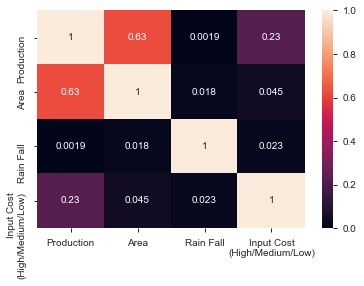

Sikkim


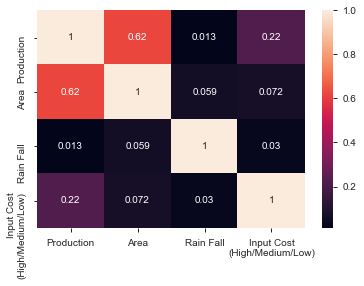

Telangana 


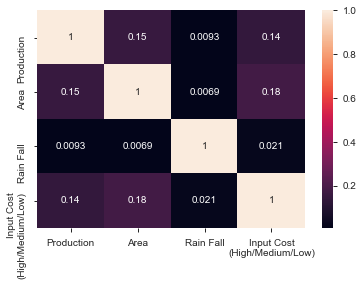

Tripura


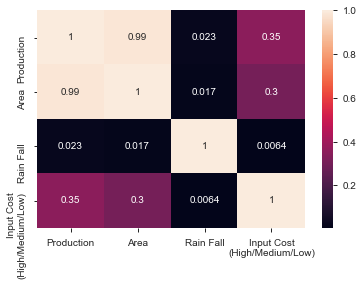

Uttar Pradesh


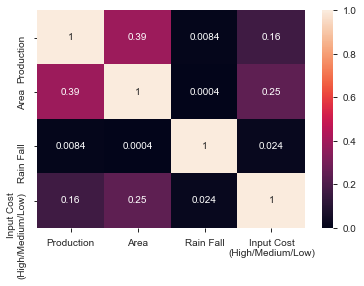

Uttarakhand


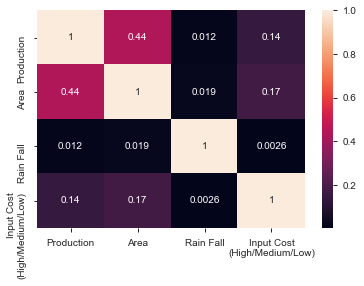

Chhattisgarh


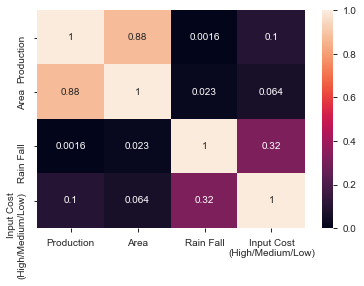

Karnataka


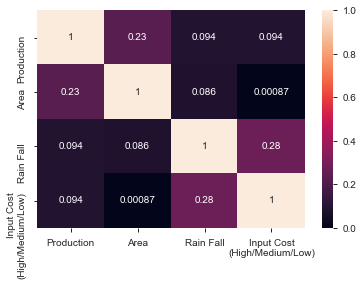

Kerala


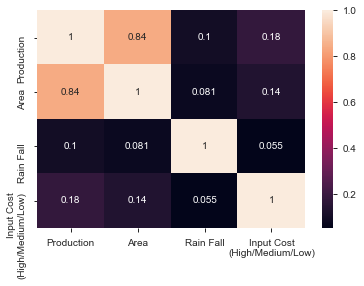

Tamil Nadu


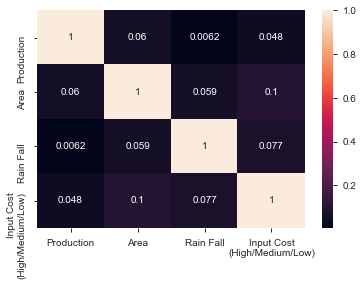

West Bengal


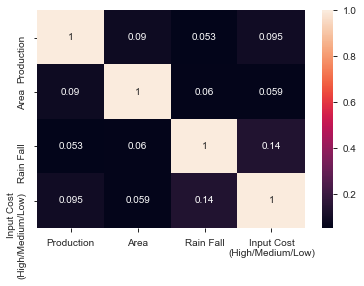

In [40]:
for i in df['State Name'].unique():
    print(i)
    sns.heatmap(np.abs(df_feature_selection[df_feature_selection['State Name']==i].corr()),annot=True)
    plt.show()

# ------------------------------------------------END-------------------------------------------------------

# Individual model for each state

In [46]:
df1.dropna(inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn import linear_model
from   sklearn.metrics  import mean_squared_error,r2_score,accuracy_score

In [ ]:
lm =  linear_model.LinearRegression()

In [75]:
df['State Name'].unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Dadra and Nagar Haveli', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan',
       'Sikkim', 'Telangana ', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'Chhattisgarh', 'Karnataka', 'Kerala', 'Tamil Nadu', 'West Bengal'],
      dtype=object)

Chhattisgarh RMSE 0.25491438411736717
Chhattisgarh R2 0.9906667712200282


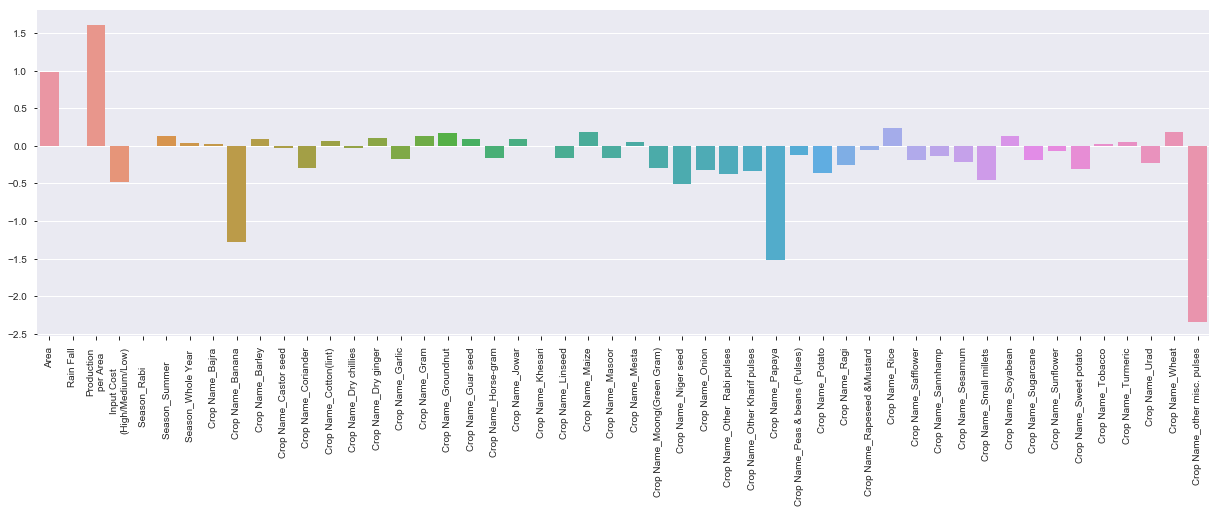

Karnataka RMSE 0.23731439560313297
Karnataka R2 0.9933312692755927


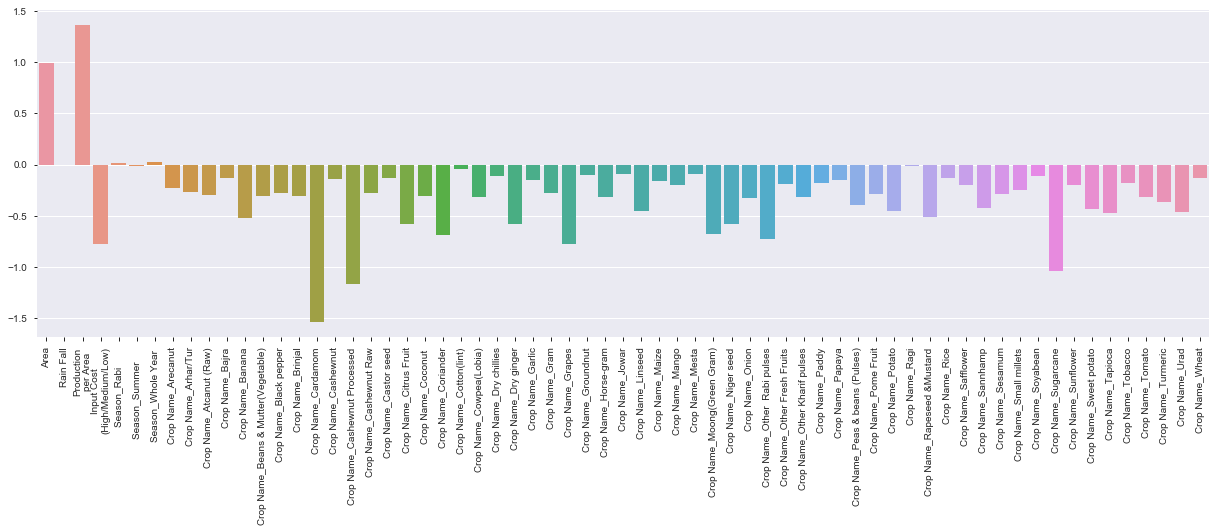

Kerala RMSE 0.3648240818769528
Kerala R2 0.9925004846081433


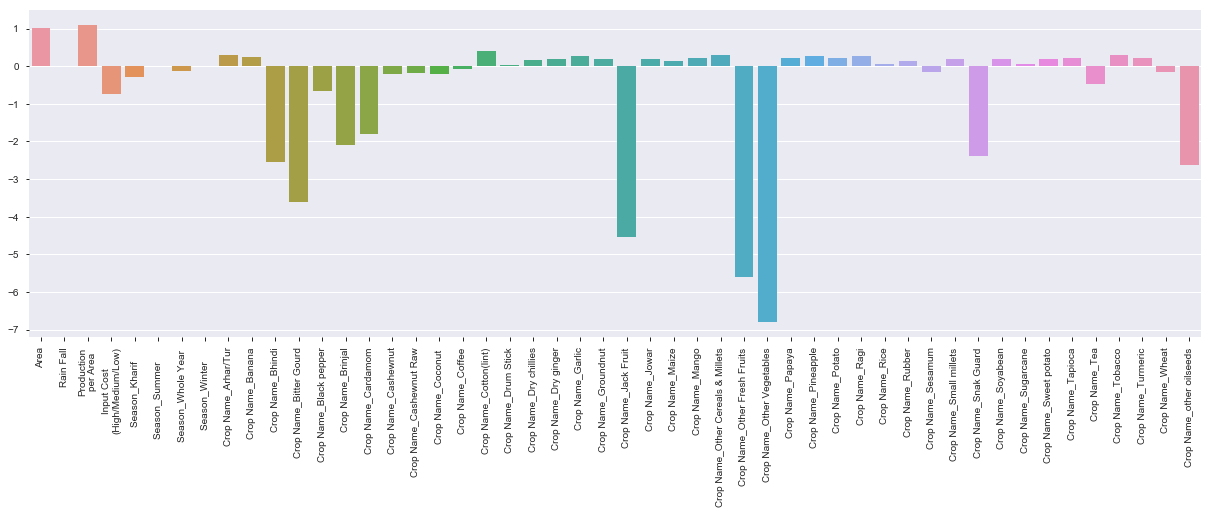

Tamil Nadu RMSE 0.4274774122270779
Tamil Nadu R2 0.9866128363661238


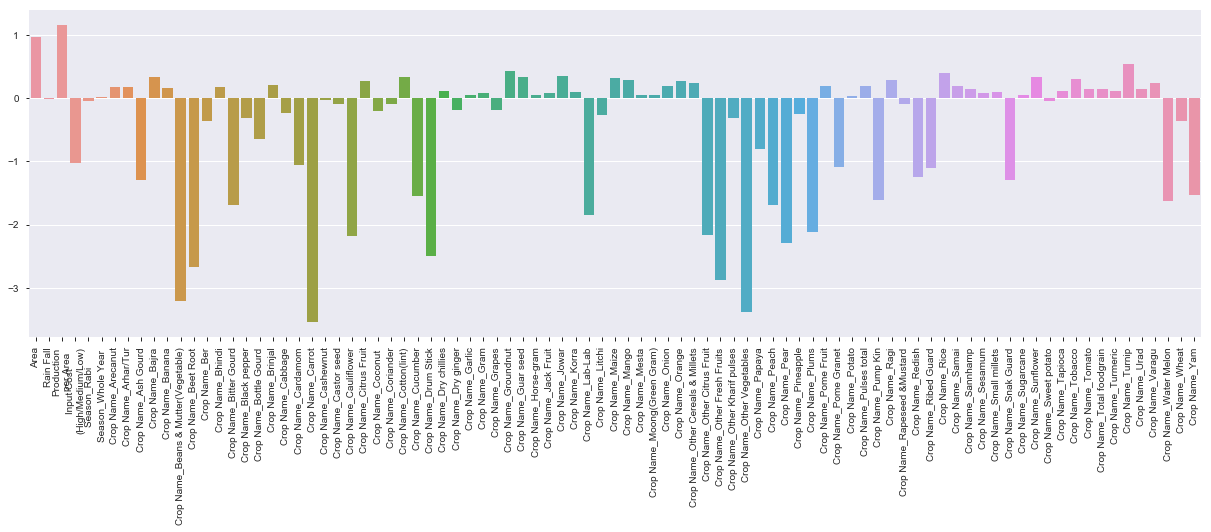

West Bengal RMSE 0.1933126539099789
West Bengal R2 0.9966421072652668


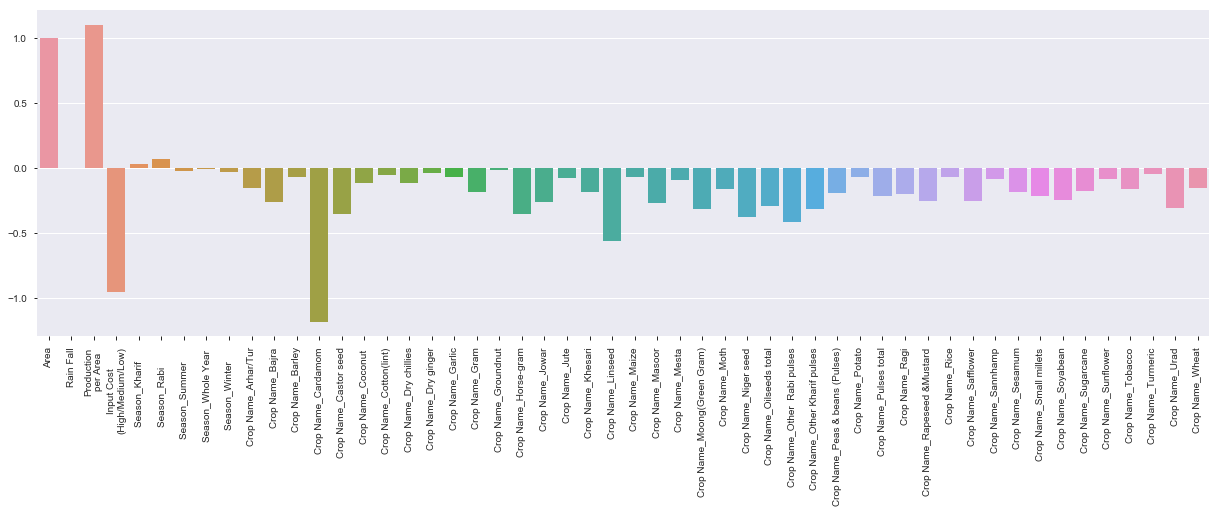

In [77]:
for i in ['Chhattisgarh','Karnataka','Kerala','Tamil Nadu','West Bengal']:
    ds=df1[df1['State Name']==i][['Area', 'Production', 'Rain Fall', 'Production\nper Area',
       'Input Cost\n(High/Medium/Low)','Season', 'Crop Name']]
    df_dummies = pd.get_dummies(ds, drop_first=True)
    X=df_dummies.drop('Production',axis=1)
    y=df_dummies['Production']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    lm.fit(X_train,y_train)
    lm_pred=lm.predict(X_test)
    print(i,'RMSE',np.sqrt(mean_squared_error(y_test, lm_pred)))
    print(i,'R2',r2_score(y_test, lm_pred))
    
    plt.figure(figsize=(21,6))
    plt.xticks(rotation='vertical')
    #plt.ylim(-2,2)
    sns.barplot(X_train.columns,lm.coef_)
    plt.show()

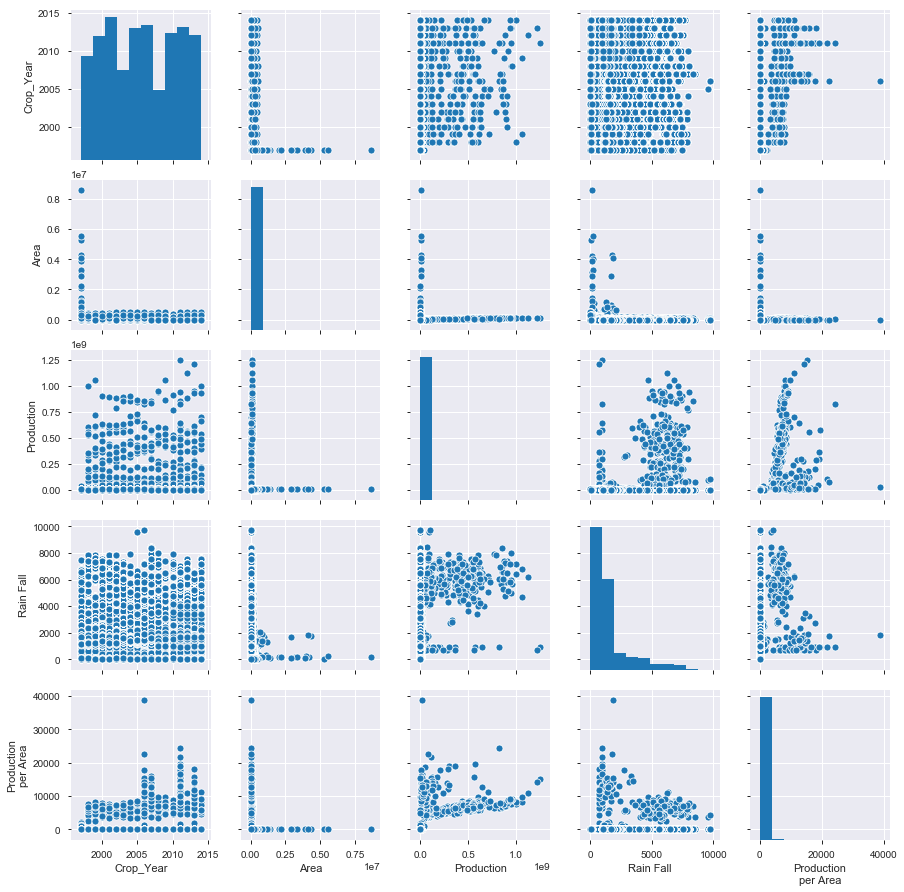

In [35]:
sns.pairplot(sample1_df)

# Model for Karnatak state alone 

In [60]:
ds=df1[df1['State Name']=='Karnataka'][['Area', 'Production', 'Rain Fall', 'Production\nper Area',
       'Input Cost\n(High/Medium/Low)','Season', 'Crop Name']]

In [61]:
df_dummies = pd.get_dummies(ds, drop_first=True)

In [62]:
X=df_dummies.drop('Production',axis=1)
y=df_dummies['Production']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [66]:
lm =  linear_model.LinearRegression()

In [67]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [68]:
lm_pred=lm.predict(X_test)
LM_RMSE       =  np.sqrt(mean_squared_error(y_test, lm_pred))
LM_r2       =  r2_score(y_test, lm_pred)

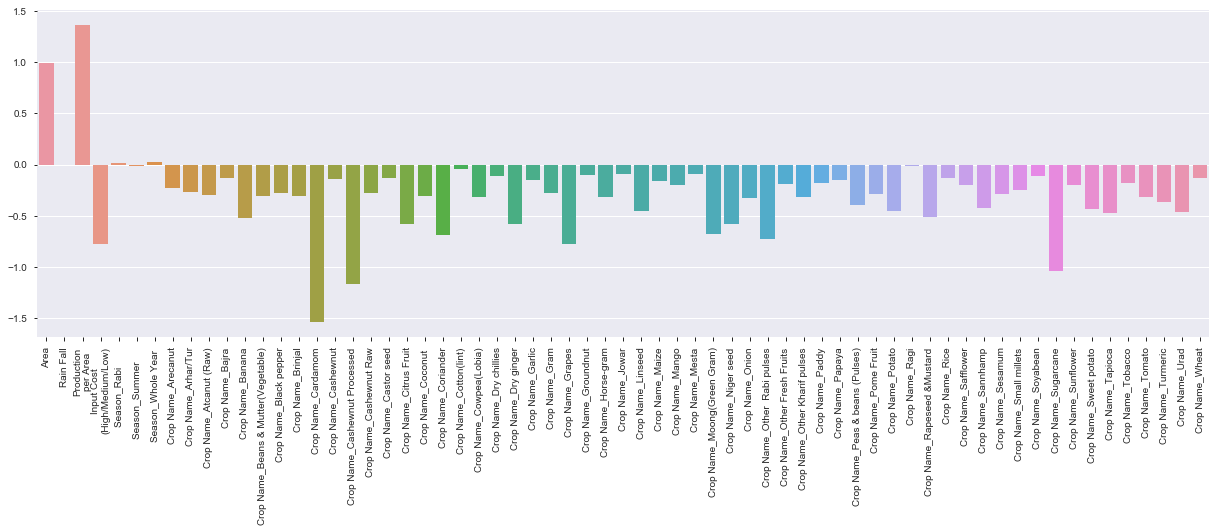

In [69]:
plt.figure(figsize=(21,6))
plt.xticks(rotation='vertical')
#plt.ylim(-2,2)
sns.barplot(X_train.columns,lm.coef_)
plt.show()

In [70]:
LM_RMSE

0.23731439560313297

In [71]:
LM_r2

0.9933312692755927

# Profitable crops based on ROI

In [170]:
df[(df['Input Cost\n(High/Medium/Low)']==1)&(df['Return\n(High/Moderate/Low)']==2)]

,State Name,City Name,Crop_Year,Season,Crop Name,Area,Production,Rain Fall,Production per Area,Input Cost (High/Medium/Low),Market Price (High/Medium/Low),Return (High/Moderate/Low)
186862,Chhattisgarh,BALOD,2012,Kharif,Rice,177182.0,357486.0,508.446,2.017620,1,1,2
186871,Chhattisgarh,BALOD,2013,Kharif,Mesta,16.0,35.0,982.900,2.187500,1,1,2
186914,Chhattisgarh,BALODA BAZAR,2012,Kharif,Mesta,29.0,72.0,508.446,2.482759,1,1,2
186927,Chhattisgarh,BALODA BAZAR,2013,Kharif,Mesta,28.0,70.0,528.600,2.500000,1,1,2
186929,Chhattisgarh,BALODA BAZAR,2013,Kharif,Other Kharif pulses,128.0,352.0,528.600,2.750000,1,1,2
186942,Chhattisgarh,BALODA BAZAR,2014,Kharif,Mesta,17.0,40.0,934.400,2.352941,1,1,2
186963,Chhattisgarh,BALRAMPUR,2011,Kharif,Potato,129.0,631.0,509.510,4.891473,1,1,2
186981,Chhattisgarh,BALRAMPUR,2012,Kharif,Potato,145.0,974.0,858.900,6.717241,1,1,2
187004,Chhattisgarh,BALRAMPUR,2013,Kharif,Sugarcane,44097.0,2129180.0,992.600,48.284010,1,1,2
187015,Chhattisgarh,BALRAMPUR,2014,Kharif,Potato,137.0,773.0,509.510,5.642336,1,1,2


# ---------------------------------------------END------------------------------------------------------

In [99]:
df[df['State Name']=='West Bengal'].sort_values('Production\nper Area',ascending=False)

,State Name,City Name,Crop_Year,Season,Crop Name,Area,Production,Rain Fall,Production per Area,Input Cost (High/Medium/Low),Market Price (High/Medium/Low),Return (High/Moderate/Low)
244360,West Bengal,BIRBHUM,2006,Whole Year,Coconut,509.0,19749200.0,1831.100,38800.000000,1,1,2
243950,West Bengal,24 PARAGANAS NORTH,2006,Whole Year,Coconut,3338.0,75095000.0,1772.800,22497.004194,1,1,1
244553,West Bengal,DARJEELING,2006,Whole Year,Coconut,168.0,2970700.0,2757.400,17682.738095,1,1,2
244560,West Bengal,DARJEELING,2007,Whole Year,Coconut,155.0,2480000.0,3285.300,16000.000000,1,1,1
245613,West Bengal,PURULIA,2007,Whole Year,Coconut,58.0,898000.0,1890.600,15482.758621,1,1,1
245305,West Bengal,MEDINIPUR WEST,2006,Whole Year,Coconut,1180.0,18035100.0,1370.400,15283.983051,1,1,2
244812,West Bengal,HOOGHLY,2006,Whole Year,Coconut,1189.0,17264300.0,1270.400,14520.016821,1,1,2
245008,West Bengal,JALPAIGURI,2007,Whole Year,Coconut,798.0,11538800.0,3507.800,14459.649123,1,1,2
245400,West Bengal,MURSHIDABAD,2006,Whole Year,Coconut,4202.0,59361700.0,1848.800,14127.010947,1,1,1
244999,West Bengal,JALPAIGURI,2006,Whole Year,Coconut,792.0,11167200.0,3120.700,14100.000000,1,1,2


In [78]:
df.sort_values('Area')

,State Name,City Name,Crop_Year,Season,Crop Name,Area,Production,Rain Fall,Production per Area,Input Cost (High/Medium/Low),Market Price (High/Medium/Low),Return (High/Moderate/Low)
46335,Goa,NORTH GOA,2014,Kharif,Ragi,0.10,0.08,754.400,0.800000,2,2,2
60,Andaman and Nicobar Islands,NICOBARS,2006,Whole Year,Sugarcane,0.20,0.50,2608.900,2.500000,1,1,1
222622,Kerala,THRISSUR,2014,Whole Year,Sugarcane,0.24,2.00,5623.500,8.333333,1,1,1
222606,Kerala,THRISSUR,2013,Whole Year,Sugarcane,0.29,3.00,6025.200,10.344828,1,1,1
106522,Mizoram,LUNGLEI,2004,Kharif,Masoor,0.50,0.20,495.400,0.400000,3,3,2
65072,Jharkhand,DHANBAD,2007,Rabi,Rapeseed &Mustard,0.58,0.31,205.800,0.534483,2,2,2
220143,Kerala,KASARAGOD,2011,Whole Year,Sugarcane,0.63,5.00,6760.200,7.936508,1,1,1
65060,Jharkhand,DHANBAD,2006,Rabi,Arhar/Tur,0.80,1.00,205.800,1.250000,2,2,2
219509,Kerala,IDUKKI,2011,Kharif,Sesamum,0.97,0.12,1987.230,0.123711,3,3,1
33780,Bihar,KATIHAR,1998,Whole Year,Dry ginger,1.00,1.00,768.800,1.000000,2,2,2


In [86]:
df[(df['State Name']=='Karnataka')&(df['Crop Name']=='Ragi')].groupby('Crop_Year').mean()

,Area,Production,Rain Fall,Production per Area,Input Cost (High/Medium/Low),Market Price (High/Medium/Low),Return (High/Moderate/Low)
Crop_Year,,,,,,,
1997,28440.787879,38576.151515,939.868970,1.403290,1.969697,1.666667,1.121212
1998,23969.279070,40327.348837,1040.515116,1.653484,1.697674,1.488372,1.418605
1999,20362.866667,31159.155556,1038.229778,1.395729,1.955556,1.666667,1.244444
2000,21759.595745,39049.617021,922.977702,1.674469,1.893617,1.234043,1.234043
2001,21668.863636,34984.272727,1010.506205,1.410123,1.977273,1.568182,1.318182
2002,17435.181818,16238.386364,1047.296023,1.030156,2.113636,1.977273,1.340909
2003,22687.863636,25570.295455,1130.532409,0.963066,2.136364,2.090909,1.272727
2004,19409.586957,35084.195652,1033.973783,1.495891,1.978261,1.391304,1.239130
2005,19970.851064,35240.553191,931.130106,1.963597,1.510638,1.276596,1.234043


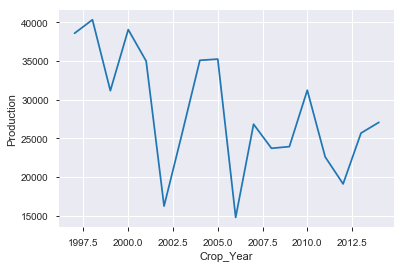

In [90]:
sns.lineplot(df[(df['State Name']=='Karnataka')&(df['Crop Name']=='Ragi')].groupby('Crop_Year').mean().index,
               df[(df['State Name']=='Karnataka')&(df['Crop Name']=='Ragi')].groupby('Crop_Year').mean()['Production'])

In [75]:
df[(df['Crop_Year']==2011)].sort_values('Production',ascending=False)

,State Name,City Name,Crop_Year,Season,Crop Name,Area,Production,Rain Fall,Production per Area,Input Cost (High/Medium/Low),Market Price (High/Medium/Low),Return (High/Moderate/Low)
223536,Tamil Nadu,COIMBATORE,2011,Whole Year,Coconut,82704.00,1.250800e+09,926.500,15123.815051,1,1,2
221322,Kerala,MALAPPURAM,2011,Whole Year,Coconut,109229.36,9.467810e+08,5982.400,8667.825207,1,1,1
221019,Kerala,KOZHIKODE,2011,Whole Year,Coconut,127699.25,8.520090e+08,6582.600,6671.996899,1,1,1
231238,Tamil Nadu,THANJAVUR,2011,Whole Year,Coconut,33742.00,8.238000e+08,926.500,24414.676071,1,1,2
2378,Andhra Pradesh,EAST GODAVARI,2011,Whole Year,Coconut,50741.00,7.199610e+08,451.300,14188.940896,1,1,1
233938,Tamil Nadu,TIRUPPUR,2011,Whole Year,Coconut,51478.00,6.467000e+08,926.500,12562.648122,1,1,2
219820,Kerala,KANNUR,2011,Whole Year,Coconut,90350.48,6.445110e+08,6457.200,7133.454078,1,1,1
222565,Kerala,THRISSUR,2011,Whole Year,Coconut,89676.79,6.079990e+08,5829.300,6779.892545,1,1,1
225136,Tamil Nadu,DINDIGUL,2011,Whole Year,Coconut,29478.00,5.749000e+08,926.500,19502.679965,1,1,2
222283,Kerala,THIRUVANANTHAPURAM,2011,Whole Year,Coconut,71423.51,5.723720e+08,5682.800,8013.775856,1,1,1


In [78]:
df[df['State Name']=='Tamil Nadu'].sort_values('Production',ascending=False)

,State Name,City Name,Crop_Year,Season,Crop Name,Area,Production,Rain Fall,Production per Area,Input Cost (High/Medium/Low),Market Price (High/Medium/Low),Return (High/Moderate/Low)
223536,Tamil Nadu,COIMBATORE,2011,Whole Year,Coconut,82704.0,1.250800e+09,926.500,15123.815051,1,1,2
223594,Tamil Nadu,COIMBATORE,2013,Whole Year,Coconut,84531.0,1.212000e+09,741.900,14337.935195,1,1,2
231238,Tamil Nadu,THANJAVUR,2011,Whole Year,Coconut,33742.0,8.238000e+08,926.500,24414.676071,1,1,2
233938,Tamil Nadu,TIRUPPUR,2011,Whole Year,Coconut,51478.0,6.467000e+08,926.500,12562.648122,1,1,2
225136,Tamil Nadu,DINDIGUL,2011,Whole Year,Coconut,29478.0,5.749000e+08,926.500,19502.679965,1,1,2
231282,Tamil Nadu,THANJAVUR,2013,Whole Year,Coconut,35237.0,5.557000e+08,741.900,15770.355025,1,1,2
232055,Tamil Nadu,THENI,2011,Whole Year,Coconut,19116.0,3.649000e+08,926.500,19088.721490,1,1,2
233990,Tamil Nadu,TIRUPPUR,2013,Whole Year,Coconut,56484.0,3.613000e+08,741.900,6396.501664,1,1,2
235427,Tamil Nadu,VELLORE,2011,Whole Year,Coconut,22680.0,2.985000e+08,926.500,13161.375661,1,1,2
227178,Tamil Nadu,KRISHNAGIRI,2011,Whole Year,Coconut,15550.0,2.972000e+08,926.500,19112.540193,1,1,2


# Area

In [90]:
df.groupby(['Season'],as_index=False).sum().sort_values('Area',ascending=False)['Area']

1    1.403286e+09
2    9.479091e+08
4    2.546494e+08
5    2.195979e+08
3    7.504814e+07
0    4.741822e+07
Name: Area, dtype: float64

In [95]:
df.groupby(['Season'],as_index=False).sum().sort_values('Area',ascending=False)['Area'][1]

1403285827.9999998

In [96]:
df.groupby(['Season'],as_index=False).sum().sort_values('Area',ascending=False)['Area'][1]/df['Area'].sum()

0.4760275961644538

# Sugarcane UP

In [102]:
df[(df['State Name']=='Uttar Pradesh')&(df['Crop Name']=='Sugarcane')].groupby(['Season']).sum()

,Area,Production,Rain Fall,Production per Area,Input Cost (High/Medium/Low),Market Price (High/Medium/Low),Return (High/Moderate/Low)
Season,,,,,,,
Kharif,23607147.0,1.408297e+09,638093.630,42049.774114,790,790,790
Whole Year,13862820.0,7.945776e+08,392403.291,24846.864704,486,486,486


In [103]:
df[(df['Crop Name']=='Sugarcane')].groupby(['Season']).sum()

,Area,Production,Rain Fall,Production per Area,Input Cost (High/Medium/Low),Market Price (High/Medium/Low),Return (High/Moderate/Low)
Season,,,,,,,
Autumn,534.23,1.374295e+04,3471.804,1.191575e+02,6,6,6
Kharif,28283727.00,1.774444e+09,948273.196,6.521630e+04,1171,1170,1171
Rabi,1461.00,2.771600e+04,10090.918,2.654220e+02,13,13,13
Summer,150.00,4.900000e+03,1525.300,6.564286e+01,2,2,2
Whole Year,48118891.52,3.745173e+09,7421433.788,1.434413e+06,6359,6304,6628
Winter,251459.00,1.601724e+07,354312.427,2.621220e+04,444,444,444


# Shapiro

In [1]:
from scipy.stats import shapiro

In [69]:
stat, p = shapiro(df['Production'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
p

Statistics=0.013, p=0.000


C:\Users\hari\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1653: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


0.0

In [61]:
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Sample does not look Gaussian (reject H0)


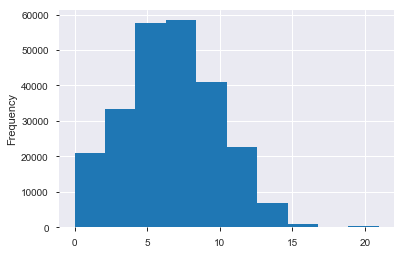

In [64]:
df1['Production'].plot(kind='hist')

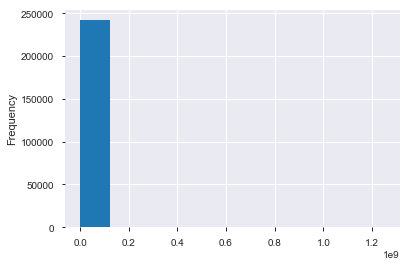

In [65]:
df['Production'].plot(kind='hist')

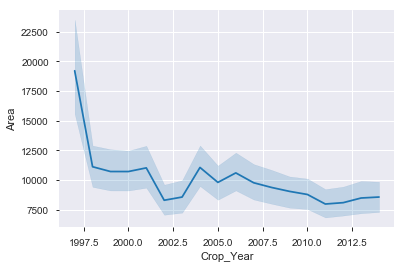

In [103]:
sns.lineplot('Crop_Year','Area',data=df[df['State Name']=='Karnataka'][['City Name','Crop_Year','Area']])

In [107]:
df[df['State Name']=='Karnataka'].groupby('Crop_Year').mean()

,Area,Production,Rain Fall,Production per Area,Input Cost (High/Medium/Low),Market Price (High/Medium/Low),Return (High/Moderate/Low)
Crop_Year,,,,,,,
1997,19217.175105,89880.793249,1469.561093,5.297134,1.822785,1.723629,1.527426
1998,11116.176591,16393.505133,1411.994848,2.741083,1.896304,1.855236,1.581109
1999,10712.314151,49980.795283,1670.975390,4.696043,2.047170,1.980189,1.666981
2000,10711.309392,55622.651105,1710.434207,4.543312,1.983425,1.919890,1.628913
2001,11020.074187,47359.792785,1619.215798,3.976141,2.086382,2.008130,1.660569
2002,8288.363235,34060.339191,2050.862039,4.501935,1.952941,1.899265,1.571324
2003,8556.897395,22205.108919,1954.330841,4.313712,1.955801,1.917127,1.584057
2004,11055.584112,28578.656523,1614.742990,3.154062,2.037383,1.976636,1.619626
2005,9795.102482,30679.465172,1468.363681,4.429806,1.859087,1.800641,1.581265


In [11]:
df.dropna(inplace=True)

In [23]:
df[(df['Crop Name']=='Coconut ')&(df['State Name']=='Tamil Nadu')].groupby('Crop_Year').sum()

,Area,Production,Rain Fall,Production per Area
Crop_Year,,,,
2002,345825.0,2.860700e+06,28069.125,229.433333
2003,352710.0,2.560500e+06,9758.000,217.890543
2004,357056.0,4.097000e+06,32086.800,315.453375
2005,370455.0,4.867100e+04,36877.200,3.415600
2006,374604.0,5.429900e+04,27186.700,3.939561
2007,383366.0,5.438500e+04,29272.800,3.825128
2008,344812.0,5.362000e+07,35956.100,4288.562422
2009,400466.0,5.547100e+06,30246.520,438.174437
2011,419400.0,6.200900e+09,28721.500,410692.994458


In [24]:
df[(df['Crop Name']=='Coconut ')].sort_values('Production\nper Area')

,State Name,City Name,Crop_Year,Season,Crop Name,Area,Production,Rain Fall,Production per Area,Input Cost (High/Medium/Low),Market Price (High/Medium/Low),Return (High/Moderate/Low)
231437,Tamil Nadu,THE NILGIRIS,2003,Whole Year,Coconut,52.0,0.0,348.500,0.000000,High,High,Moderate
231514,Tamil Nadu,THE NILGIRIS,2007,Whole Year,Coconut,79.0,1.0,1894.600,0.012658,High,High,Low
231498,Tamil Nadu,THE NILGIRIS,2006,Whole Year,Coconut,74.0,1.0,1658.500,0.013514,High,High,Moderate
232346,Tamil Nadu,THIRUVALLUR,2005,Whole Year,Coconut,1484.0,66.0,2005.400,0.044474,High,High,Low
46344,Goa,NORTH GOA,2014,Whole Year,Coconut,11399.0,564.0,957.300,0.049478,High,High,Moderate
46327,Goa,NORTH GOA,2013,Whole Year,Coconut,11379.0,564.0,754.400,0.049565,High,High,Moderate
46445,Goa,SOUTH GOA,2014,Whole Year,Coconut,14387.0,714.0,926.500,0.049628,High,High,Moderate
46430,Goa,SOUTH GOA,2013,Whole Year,Coconut,14371.0,717.0,926.500,0.049892,High,High,Moderate
228897,Tamil Nadu,PERAMBALUR,2007,Whole Year,Coconut,926.0,47.0,908.400,0.050756,High,High,Moderate
228870,Tamil Nadu,PERAMBALUR,2006,Whole Year,Coconut,892.0,49.0,755.500,0.054933,High,High,Moderate


In [27]:
df[(df['State Name']=='Andhra Pradesh')].sort_values('Production',ascending=False)

,State Name,City Name,Crop_Year,Season,Crop Name,Area,Production,Rain Fall,Production per Area,Input Cost (High/Medium/Low),Market Price (High/Medium/Low),Return (High/Moderate/Low)
2543,Andhra Pradesh,EAST GODAVARI,2014,Whole Year,Coconut,46865.0,780162000.0,1847.917,16647.007362,Low,Low,Low
2432,Andhra Pradesh,EAST GODAVARI,2012,Whole Year,Coconut,49516.0,729965000.0,464.600,14742.002585,Low,Low,Low
2488,Andhra Pradesh,EAST GODAVARI,2013,Whole Year,Coconut,49114.0,720895000.0,1570.864,14677.994055,Low,Low,Low
2378,Andhra Pradesh,EAST GODAVARI,2011,Whole Year,Coconut,50741.0,719961050.0,451.300,14188.940896,Low,Low,Low
9829,Andhra Pradesh,WEST GODAVARI,2014,Whole Year,Coconut,21729.0,718991000.0,677.886,33089.005477,Low,Low,Low
2001,Andhra Pradesh,EAST GODAVARI,2002,Whole Year,Coconut,49479.0,685943720.0,787.860,13863.330302,Low,Low,Low
2057,Andhra Pradesh,EAST GODAVARI,2003,Whole Year,Coconut,48854.0,683171460.0,1223.690,13983.941131,Low,Low,Low
2106,Andhra Pradesh,EAST GODAVARI,2004,Whole Year,Coconut,49381.0,674125653.0,200.100,13651.518864,Low,Low,Low
1953,Andhra Pradesh,EAST GODAVARI,2001,Whole Year,Coconut,48515.0,629772990.0,486.178,12980.995362,Low,Low,Low
2193,Andhra Pradesh,EAST GODAVARI,2006,Whole Year,Coconut,49592.0,613037376.0,1053.700,12361.618326,Low,Low,Low


In [30]:
df.groupby('Crop Name').sum().sort_values('Area',ascending=False)

,Crop_Year,Area,Production,Rain Fall,Production per Area
Crop Name,,,,,
Rice,29941132,7.454018e+08,1.603258e+09,1.144685e+07,2.972560e+04
Wheat,15798997,4.707132e+08,1.332826e+09,5.993016e+06,1.648297e+04
Cotton(lint),8775767,1.565282e+08,2.969520e+08,3.809072e+06,9.031658e+03
Bajra,10785203,1.409679e+08,1.296810e+08,4.370320e+06,6.314256e+03
Jowar,13995868,1.376465e+08,1.145918e+08,5.920429e+06,7.324378e+03
Soyabean,6379515,1.354501e+08,1.418372e+08,2.676244e+06,3.334566e+03
Maize,27654804,1.214845e+08,2.733418e+08,1.118837e+07,3.629799e+04
Gram,14493010,1.181906e+08,9.941424e+07,5.569433e+06,6.000596e+03
Groundnut,17575636,1.026826e+08,1.117262e+08,7.085414e+06,1.047584e+04
